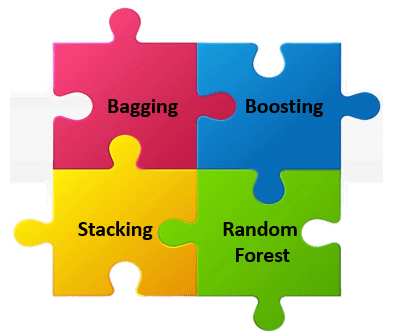

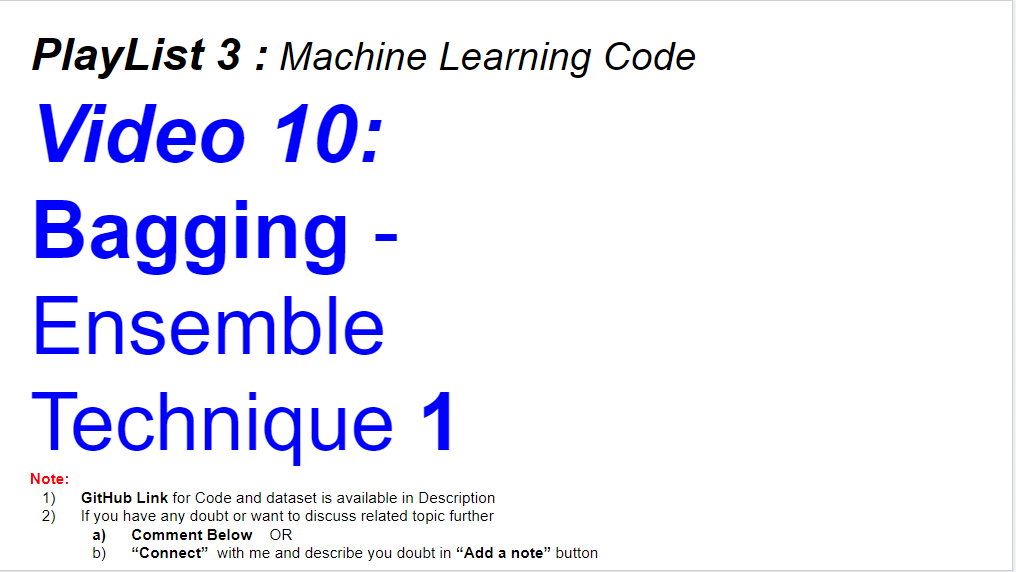

## Ensemble Techniques

We regularly come across many game shows on television and you must have noticed an option of “Audience Poll”. Most of the times a contestant goes with the option which has the highest vote from the audience and most of the times they win. We can generalize this in real life as well where taking opinions from a majority of people is much more preferred than the opinion of a single person.
Ensemble technique has a similar underlying idea where we aggregate predictions from a group of predictors, which may be classifiers or regressors, and most of the times the prediction is better than the one obtained using a single predictor. Such algorithms are called Ensemble methods and such predictors are called Ensembles.

Let’s suppose we have ‘n’ predictors:

Z1, Z2, Z3, ......., Zn with a standard deviation of σ

Var(z) = σ^2

If we use single predictors Z1, Z2, Z3, ......., Zn the variance associated with each will be σ2 but the expected value will be the average of all the predictors.

Let’s consider the average of the predictors:

µ = (Z1 + Z2 + Z3+.......+ Zn)/n

if we use µ as the predictor then the expected value still remains the same but see the variance now:

variance(µ) = σ^2/n

So, the expected value remained ‘µ’ but variance decreases when we use average of all the predictors.

This is why taking mean is preferred over using single predictors.

Ensemble methods take multiple small models and combine their predictions to obtain a more powerful predictive power.

There are few very popular Ensemble techniques which we will talk about in detail such as Bagging, Boosting, stacking etc.

<img src="ensemble.PNG"> 

image courtsey: Google

<img src="1.PNG">                           



### Bagging (Bootstrap Aggregation)

In real life scenarios we don’t have multiple different training sets on which we can train our model separately and at the end combine their result. Here, bootstrapping comes into picture. Bootstrapping is a technique of sampling different sets of data from a given training set by using replacement. After bootstrapping the training dataset, we train model on all the different sets and aggregate the result. This technique is known as Bootstrap Aggregation or Bagging.

Let’s see definition of bagging:

Bagging is the type of ensemble technique in which a single training algorithm is used on different subsets of the training data where the subset sampling is done with replacement (bootstrap). 
Once the algorithm is trained on all the subsets, then bagging makes the prediction by aggregating all the predictions made by the algorithm on different subsets. In case of regression, bagging prediction is simply the mean of all the predictions and in the case of classifier, bagging prediction is the most frequent prediction (majority vote) among all the predictions.

Bagging is also known as parallel model since we run all models parallely and combine there results at the end.

<img src="2.PNG">        

<img src="3.PNG">  

image courtsey: Google

* Advantages of a Bagging Model

1)	Bagging significantly decreases the variance without increasing bias. 

2)	Bagging methods work so well because of diversity in the training data since the sampling is done by bootstraping.

3)	Also, if the training set is very huge, it can save computional time by training model on relatively smaller data set and still can increase the accuracy of the model.

4) Works well with small datasets as well.

* **Disadvantage of a Bagging Model

The main disadvantage of Bagging is that it improves the accuracy of the model on the expense of interpretability i.e. if a single tree was being used as the base model, then it would have a more attarctive and easily interpretable diagram, but with use of bagging this interpretability gets lost.



In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier # KNN classifier

In [34]:
# importing the dataset
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

# splitting the indepedent (X) and dependent (y) variables
X = dataset.data
y = dataset.target

In [35]:
# train - test - split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=3)

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train) # fitting / training the model
knn.score(X_test,y_test) # Calculating the accuracy

0.916083916083916

In [37]:
# Use BAGGING over KNN Classfier to check whether score imporoves
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10,
                            max_samples=0.5, # maximum 50% of data is sent to each model
                            bootstrap=True, # if False, it will be PASTing algorithm
                            random_state=3,
                            oob_score=True
                           )

bag_knn.fit(X_train,y_train) # fitting / training the model
bag_knn.score(X_test,y_test) # calculating the accuracy

0.9370629370629371

In [38]:
# Observation =
        # Accuracy is improved from 91.6 % to 93.7%

## Pasting


## Pasting

Pasting is an ensemble technique similar to bagging with the only difference being that there is no replacement done while sampling the training dataset. This causes less diversity in the sampled datasets and data ends up being correlated. That's why bagging is more preffered than pasting in real scenarios.

## Out-of-Bag Evaluation

In bagging, when different samples are collected, no sample contains all the data but a fraction of the original dataset.
There might be some data which are never sampled at all. The remaining data which are not sampled are called out of bag instances. Since the model never trains over these data, they can be used for evaluating the accuracy of the model by using these data for predicition. We do not need validation set or cross validation and can use out of bag instances for that purpose.


In [39]:
paste_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10,
                            max_samples=0.5,
                            bootstrap=False, # if False, it will be PASTing algorithm
                            random_state=3,
                            #oob_score=True
                             )

paste_knn.fit(X_train,y_train) # fitting / training the model
paste_knn.score(X_test,y_test)

0.9300699300699301

Pasting is an ensemble technique similar to bagging with the only difference being that there is no replacement done while sampling the training dataset. This causes less diversity in the sampled datasets and data ends up being correlated. That's why bagging is more preffered than pasting in real scenarios.

In [42]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train) # fitting / training the model
dt.score(X_test,y_test) # Calculating the accuracy

0.9370629370629371

In [45]:
# Use BAGGING over "Decision Tree Classfier" to check whether score imporoves
bag_dt = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=10,
                            max_samples=0.5, # maximum 50% of data is sent to each model
                            bootstrap=True, # if False, it will be PASTing algorithm
                            random_state=3,
                            oob_score=True
                           )

bag_dt.fit(X_train,y_train) # fitting / training the model
bag_dt.score(X_test,y_test) # calculating the accuracy

0.9300699300699301

In [46]:
# Use PASTing over "Decision Tree Classfier" to check whether score imporoves
paste_dt = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=10,
                            max_samples=0.5, # maximum 50% of data is sent to each model
                            bootstrap=False, # if False, it will be PASTing algorithm
                            random_state=3,
                            #oob_score=True
                           )

paste_dt.fit(X_train,y_train) # fitting / training the model
paste_dt.score(X_test,y_test) # calculating the accuracy

0.9370629370629371